<a href="https://colab.research.google.com/github/pankajigec26/GreatLearning/blob/master/Titanic_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#uploading the local csv data on colab
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


Importing the Test and Train  data in data frame and  knowing their shapes

For the sake of simplicity and doing Exploratory data analysis i will be combing the two data frames ,using concat function

In [0]:
df_titanic=pd.concat([df_train,df_test],sort=False) 
print (df_titanic.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1       0.0       3  ...   7.2500   NaN         S
1            2       1.0       1  ...  71.2833   C85         C
2            3       1.0       3  ...   7.9250   NaN         S
3            4       1.0       1  ...  53.1000  C123         S
4            5       0.0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [0]:
#Importing the csv files in data frames
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df_train=pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test=pd.read_csv(io.BytesIO(uploaded['test.csv']))


print (df_train.shape)
print (df_test.shape)

(891, 12)
(418, 11)


Displaying the dataframe more neately

In [0]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_titanic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#Finding Null values in dataframe

In [0]:

#We would be seeking the null values across the data frame using isnull() function

print (df_titanic.isnull().sum())



PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


We can see that *Age, Cabin,Survived,Emabrked* are the column containing null values , we will work on that, before that lets have a look on some more information from data set

In [0]:
#Having a look on some key aspects of data set 
df_titanic.describe().transpose()
#Replacing the NAN values with median in AGE ,Cabin,Embarked column

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


Replacing the NAN values with median of respective  column

In [0]:
#As a good practice , creating a new data set df_titan
df_titan=df_titanic.copy()

#Filling Age, Fare,Survived with their median values
df_titan['Age']=df_titan['Age'].fillna(df_titan['Age'].median())
df_titan['Fare']=df_titan['Fare'].fillna(df_titan['Fare'].median())
df_titan['Survived'] = df_titan['Survived'].fillna(df_titan['Survived'].median(),axis=0)

#For categorical column we would try to fill the NAN value with the most frequent column occurence 
df_titan['Cabin'] = df_titan.fillna(df_titan['Cabin'].value_counts().index[0])
df_titan['Embarked'] = df_titan.fillna(df_titan['Embarked'].value_counts().index[0])


#Checking for any remaining null values in data set 
print (df_titan.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


We can see from above command that there is no null values present in the data set 

#VISUALISATION OF DATA

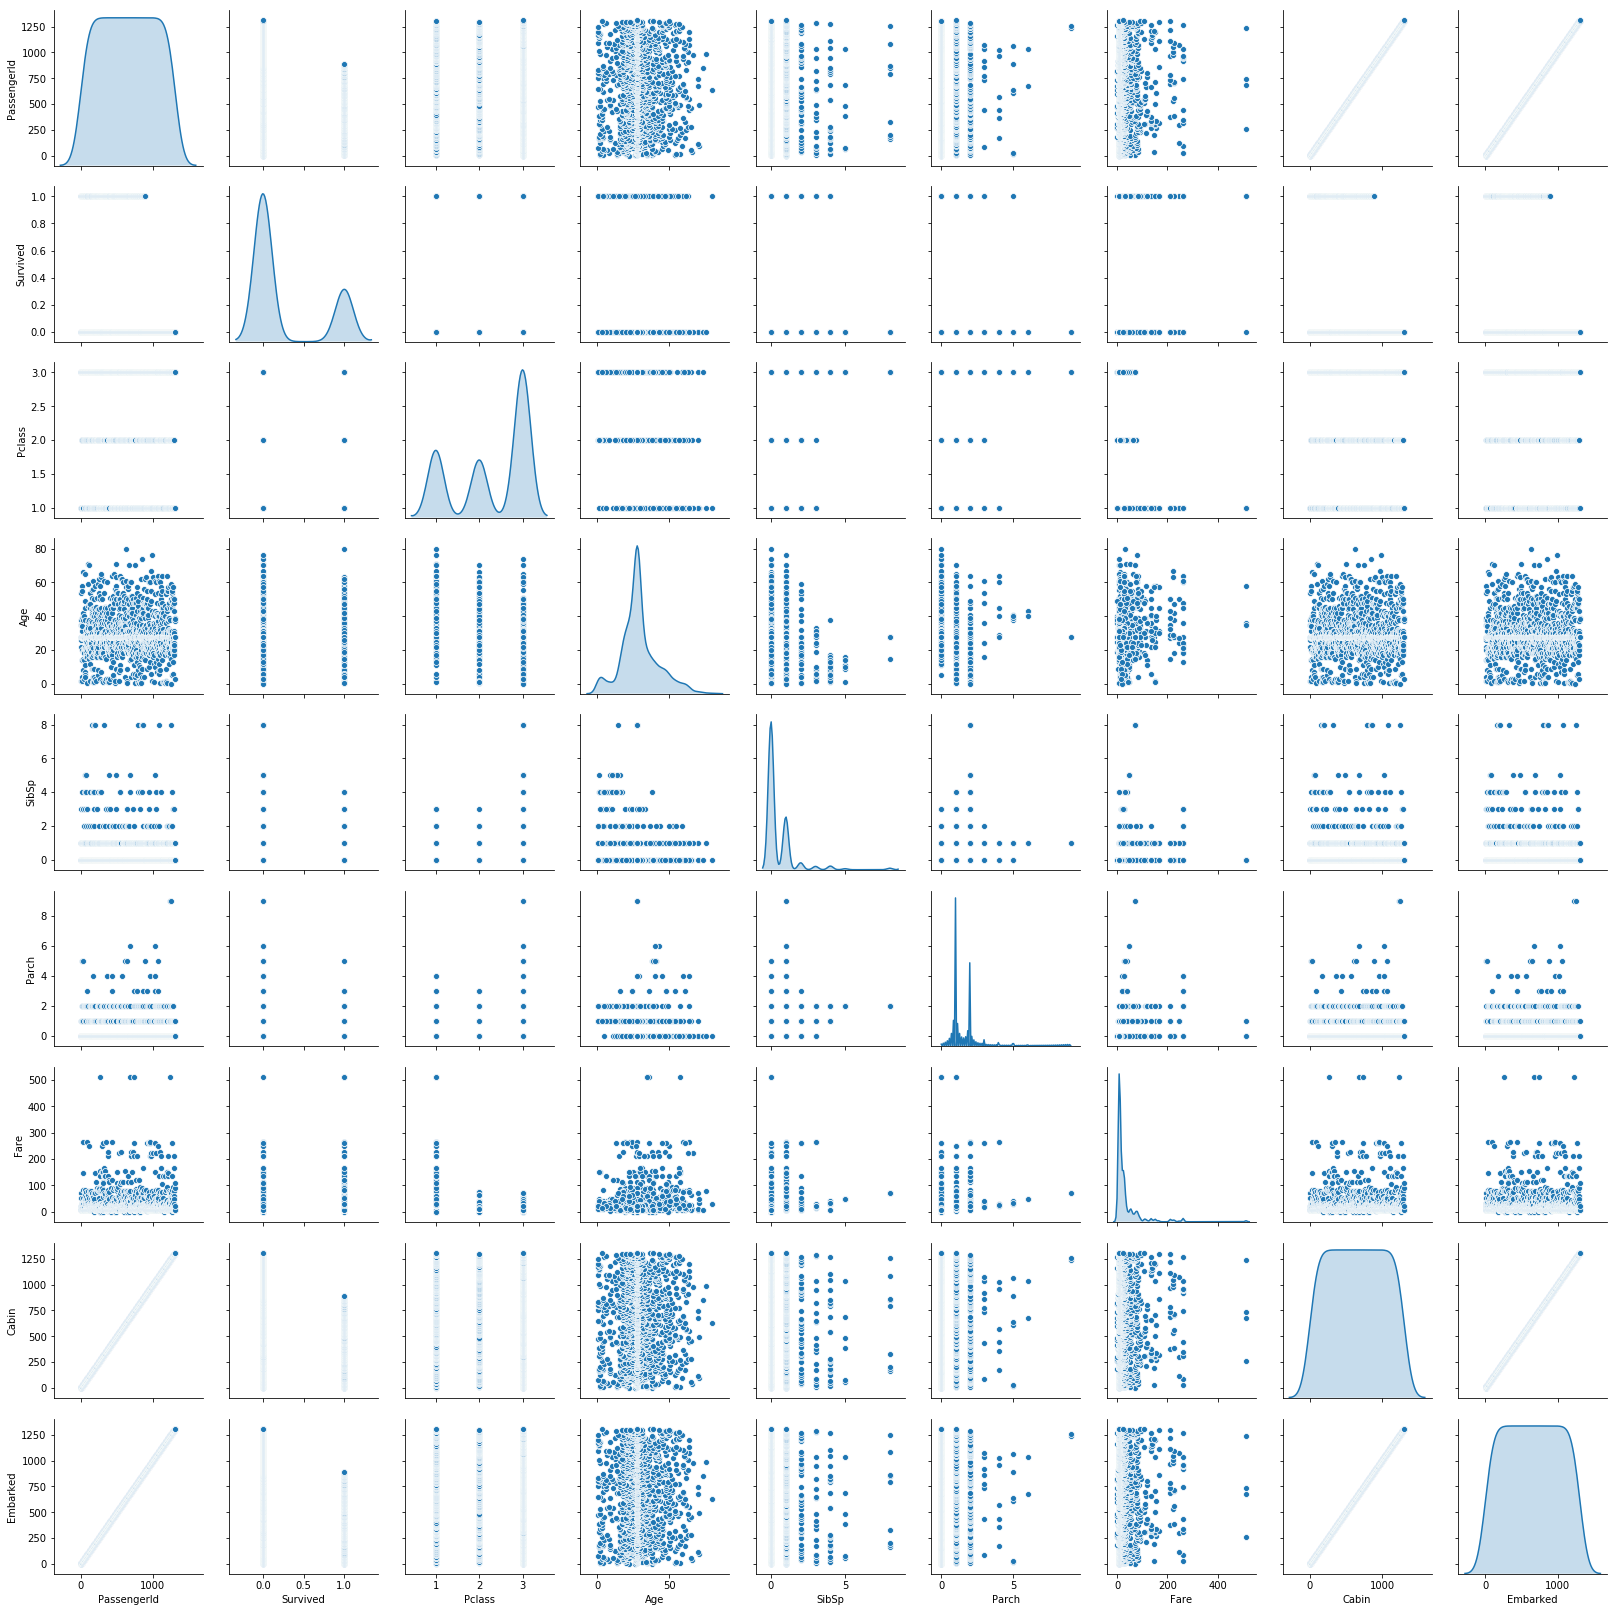

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df_titan,diag_kind='kde')

#Variance and Standard deviation

Variance says that how much variation is in data , a variation near to 0 will have no effect on target columns so its better to droo the colum, while standadar deviation is measure of  how much your data should ideally fluctuate around mean

In [0]:
print (df_titan.var(axis=0))
print (df_titan.std(axis=0))
print (df_titan.mean(axis=0))




PassengerId    142899.166667
Survived            0.193155
Pclass              0.701969
Age               166.545235
SibSp               1.085052
Parch               0.749195
Fare             2677.182798
Cabin          142899.166667
Embarked       142899.166667
dtype: float64
PassengerId    378.020061
Survived         0.439494
Pclass           0.837836
Age             12.905241
SibSp            1.041658
Parch            0.865560
Fare            51.741500
Cabin          378.020061
Embarked       378.020061
dtype: float64
PassengerId    655.000000
Survived         0.261268
Pclass           2.294882
Age             29.503186
SibSp            0.498854
Parch            0.385027
Fare            33.281086
Cabin          655.000000
Embarked       655.000000
dtype: float64


#Categorical variable 

We will handle the categorical variable in this section

In [0]:
# Sex is an important factor in determing who have survived or not but this has a data type of object 
print (df_titan['Sex'].dtypes)

#so lets change the dtypes to categorical 

#df_titan['Survived'].corr(df_titan['Sex'])


df_titan['Sex']=df_titan['Sex'].astype('category')
df_titan['Sex']=df_titan['Sex'].cat.codes


object


In [0]:
df_titan['Sex'].dtypes
#We can see that data type is now changed 


dtype('int8')

#Correlation and Data splitting 

Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [0]:


#Now putting the Independent columns in X and dependent columns in y
#I am dropping the column 'Name','Ticket','Embarked','Cabin' as i think they have no effect in prediction as of now as per my understanding
#Also dropping 'Survived' column from independent X df


X=df_titan.drop(['Survived','Name','Ticket','Embarked','Cabin'],axis=1,inplace=False)

#Creating a dependent Dataframe with Survived column

y=df_titan['Survived']


#Finding correlation between dependent variable y and Independent variable X
r=range(-1,1)
for col_name in X:
    try:
        print ("is col_name--> "+col_name+" Have correlation in range -1 to 1 ?")
        print (X[col_name].corr(y['Survived']) in r) 
    except:
        pass
        
#We have checked that all the independent columns are some kind of correlation with the dependent column and none of the correlation
#is ranging between -1 to 1 , so we will not drop a column


is col_name--> PassengerId Have correlation in range -1 to 1 ?
is col_name--> Pclass Have correlation in range -1 to 1 ?
is col_name--> Sex Have correlation in range -1 to 1 ?
is col_name--> Age Have correlation in range -1 to 1 ?
is col_name--> SibSp Have correlation in range -1 to 1 ?
is col_name--> Parch Have correlation in range -1 to 1 ?
is col_name--> Fare Have correlation in range -1 to 1 ?


#Splitting Data set

In [0]:
#Splitting the data in Train and Test set  in 80:20 ration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




In [0]:
#Verifying the shape of data 
print (X_test.shape)
print (X_train.shape)
print (y_test.shape)
print (y_train.shape)


(262, 7)
(1047, 7)
(262,)
(1047,)


#KNN classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Predicting the output from y_test data set 

In [0]:
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print(predicted)


[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
score=model.score(X_test,y_test)
#Score for predicting the survivor 
print (score)


0.732824427480916
